# Estudo sobre Redes Neurais Artificiais  
## Multi Layer Perceptrons (MLP)
### Autor: André Rizzo - USP - 2024

---  

<br>

### Carregar as bibliotecas necessárias

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### Carregar base de imagens  
Neste caso utilizaremos a base de imagens MNIST que possui ampla utilização em todo mundo.  

O MNIST é um conjunto de dados de imagens em escala de cinza de dígitos manuscritos (de 0 a 9). Ele é usado para tarefas de classificação e aprendizado supervisionado, onde o objetivo é treinar um modelo para identificar qual dígito aparece em uma imagem.  

In [2]:
mnist = keras.datasets.mnist

### Criar base de treinamento de teste

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


A linha acima carrega o conjunto de dados MNIST e retorna dois pares:  
* *(train_images, train_labels)* para treinamento.  
* *(test_images, test_labels)* para teste.  

Onde:
- *train_images*  
Um array NumPy contendo as imagens de treinamento, onde cada imagem tem dimensões (28, 28) pixels e está em escala de cinza (valores de 0 a 255).  

- *train_labels*  
Um array NumPy contendo os rótulos (ou classes) das imagens de treinamento, onde cada valor é um número inteiro de 0 a 9, correspondente ao dígito representado na imagem.  

- *test_images*  
Um array NumPy contendo as imagens de teste, com as mesmas características de train_images.  

- *test_labels*  
Um array NumPy contendo os rótulos das imagens de teste, semelhante a train_labels.



### Verificando as características da base de dados  

In [4]:
print("Qtd de images para treinamento e formato (pixels):", train_images.shape)
print("Qtd de labels para treinamento:", train_labels.shape)
print("Qtd de images para teste e formato (pixels):", test_images.shape)
print("Qtd de labels para teste:", test_labels.shape)

Qtd de images para treinamento e formato (pixels): (60000, 28, 28)
Qtd de labels para treinamento: (60000,)
Qtd de images para teste e formato (pixels): (10000, 28, 28)
Qtd de labels para teste: (10000,)


Ou seja, serão utilizadas 60000 imagens para treinamento do modelo, onde cada imagem possui dimensões de 28 x 28 pixels.  
Já para aferição do modelo serão usadas 10000 imagens.  

#### Visualizando algumas imagens  

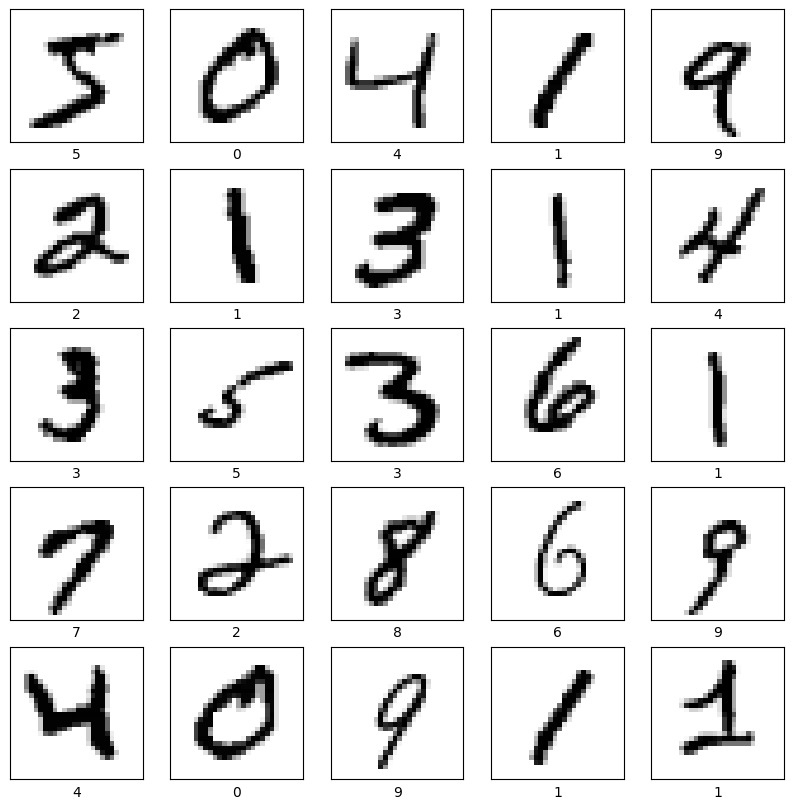

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(train_labels[i])

#### Também podemos visualizar os dígitos individualmente  

In [6]:
train_images[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

> Esta é a imagem 2 da base de treinamento.

In [7]:
train_images[10000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254,
        255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234,
        196, 253, 253, 253, 253, 233,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  93, 244, 249, 253, 187,  46,  10,   8,
          4,  10, 194, 253, 253, 233,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 107, 253, 253, 230,  48,   0,   0,   0,
          0,   0, 192, 253, 253, 156,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,  20,  20,  15,   0,   0,   0,   0,
          0,  43, 224, 253, 245,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 249, 253, 245, 126,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 101,
        223, 253, 248, 124,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 166, 239, 253,
        253, 253, 187,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  16, 248, 250, 253,
        253, 253, 253, 232, 213, 111,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  43,  98,
         98, 208, 253, 253, 253, 253, 187,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   9,  51, 119, 253, 253, 253,  76,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1, 183, 253, 253, 139,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 182, 253, 253, 104,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  85, 249, 253, 253,  36,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  60, 214, 253, 253, 173,  11,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  98, 247, 253, 253, 226,   9,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42,
        150, 252, 253, 253, 233,  53,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  42, 115,  42,  60, 115, 159, 240,
        253, 253, 250, 175,  25,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 187, 253, 253, 253, 253, 253, 253,
        253, 197,  86,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 10

> Esta é a imagem 10000 da base de treinamento.





<br>

---


### Pré-processamento

#### Normalização dos dados

Esta é uma etapa crucial no treinamento de redes neurais artificiais porque melhora significativamente o desempenho e a estabilidade da RNA. Isto ocorre pelos seguintes motivos:  

1. **Acelera a Convergência do Modelo**  
As redes neurais são treinadas por meio do algoritmo *Gradient Descent* ou  gradiente descendente, que atualiza os pesos iterativamente para minimizar a função de perda.  
Dados com escalas muito diferentes podem fazer com que os gradientes sejam desbalanceados, causando atualizações lentas ou ineficazes nos pesos.  
Normalizar os dados reduz a variância dos gradientes, resultando em uma convergência mais rápida.  

2. **Evita Problemas de Escala**  
Quando os valores das entradas têm escalas muito diferentes (por exemplo, uma entrada entre 0 e 1 e outra entre 1.000 e 10.000), o modelo pode dar peso excessivo às observações de maior escala.  
Isso acontece porque as entradas com valores maiores geram gradientes maiores, o que domina a atualização dos pesos e prejudica o aprendizado de outras entradas.  

3. **Melhora a Estabilidade Numérica**  
Dados não normalizados podem causar problemas de *overflow* ou *underflow* nos cálculos, especialmente em funções de ativação como a Sigmoide e a Tanh.  

    > *Sigmoide:* Quando os valores são muito grandes ou muito pequenos, a saída tende a saturar (próxima de 1 ou 0), levando a gradientes muito pequenos (problema de *vanishing gradients*).  

    > *Tanh:* Apresenta comportamento semelhante à Sigmoide.  

  Normalizar os dados reduz a probabilidade de saturação e mantém os valores em um intervalo onde os gradientes são mais informativos.  

4. **Facilita o Aprendizado das Redes Neurais Artificiais**  
RNAs geralmente aprendem melhor quando os dados de entrada estão centralizados (média próxima de 0) e têm variância unitária (desvio padrão próximo de 1).  
Isso é especialmente relevante para modelos que utilizam inicialização de pesos otimizados (como He ou Xavier), pois tais inicializações assumem que os dados estão normalizados.  

<br>


  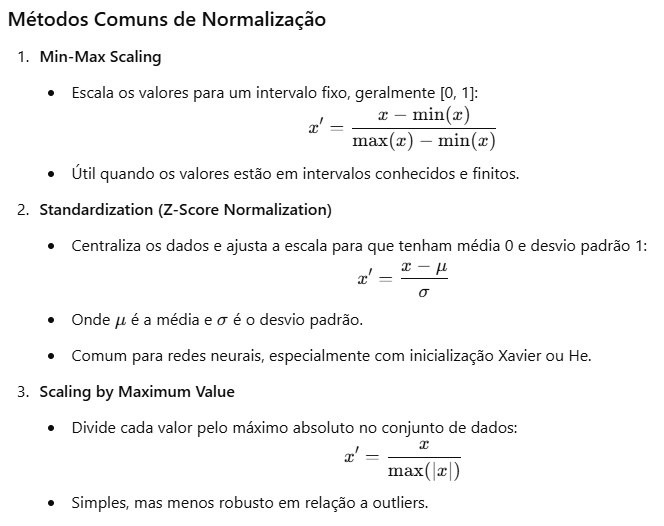

<br>  

Aqui utilizaremos a alternativa mais simples, ou seja, dividir pelo número de tons de cinza da imagem (255).

In [8]:
train_images = train_images / 255
test_images = test_images / 255

<br>

---



## Treinamento

### **Multi Layer Perceptron (MLP)**
O Multi-Layer Perceptron (MLP), ou perceptron multicamada, é uma arquitetura clássica de redes neurais onde cada camada anterior é totalmente conectada à próxima.  É um modelo simples, porém com ampla utilização.  
O modelo é composto por uma camada de entrada (*input layer*), uma ou mais camadas ocultas (*hidden layers*) e finalmente a camada de saída (*output layer*).  
Apesar da simplicidade, o MLP é capaz de identificar relações complexas e não lineares com grande eficiência.  

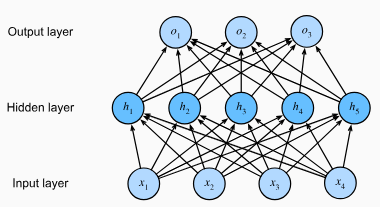  
> Fonte: https://d2l.ai/chapter_multilayer-perceptrons/mlp.html



In [9]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Interpretando as instruções acima:  

`keras.Sequential`  
> É uma API que permite empilhar camadas de forma linear, ou seja, uma camada após a outra.  
Este tipo de modelo é ideal para arquiteturas simples, onde os dados fluem sequencialmente da entrada para a saída, sem conexões complexas como ramos ou loops.  

As Camadas do Modelo:  

1. `Flatten(input_shape=(28, 28))`  
> A camada Flatten pega a entrada, que é uma matriz 2D (28x28 no caso do MNIST), e a transforma em um vetor unidimensional.Por exemplo, uma imagem 28 × 28 (784 pixels no total) será convertida em um vetor de tamanho 784.  

  > **Essa transformação é necessária porque as próximas camadas (densas) esperam dados unidimensionais.**  

  `input_shape=(28, 28)`  
> Define o formato dos dados de entrada. Aqui, especifica que as entradas são imagens de 28 × 28 pixels.  

<br>

2. `keras.layers.Dense(128, activation=tf.nn.relu)`  
> A camada Dense (ou completamente conectada) contém 128 neurônios.  

  > Cada neurônio está conectado a todos os neurônios da camada anterior (vetor achatado de 784 elementos, no caso).  

  `activation=tf.nn.relu`  
  > Especifica a função de ativação usada na camada: ReLU (Rectified Linear Unit).  
  A ReLU é usada para introduzir não-linearidade no modelo e evitar que ele se comporte como uma simples função linear.  

  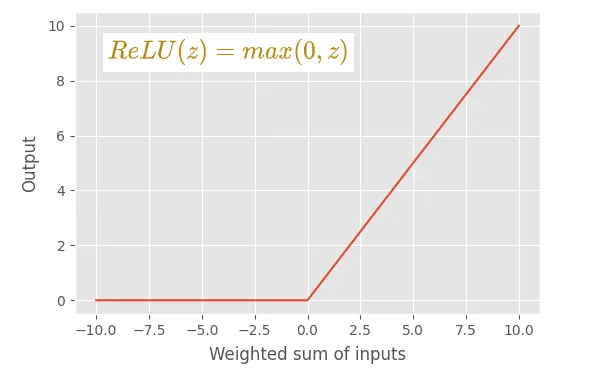  
  Fonte: https://towardsdatascience.com/how-to-choose-the-right-activation-function-for-neural-networks-3941ff0e6f9c





<br>

3. `keras.layers.Dense(10, activation=tf.nn.softmax)`  
> Outra camada Dense, agora com 10 neurônios.  
  10 representa o número de classes possíveis no dataset MNIST (dígitos de 0 a 9).  

  `activation=tf.nn.softmax`  
  > Especifica a função de ativação Softmax, usada para converter as saídas da camada em probabilidades.  
  A função Softmax normaliza os valores de saída de modo que a soma das probabilidades seja igual a 1, tornando-a ideal para problemas de classificação.  

  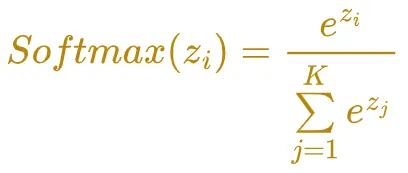  
  Fonte: https://towardsdatascience.com/how-to-choose-the-right-activation-function-for-neural-networks-3941ff0e6f9c




Algumas observações:  
* **Número de neurônios na camada de entrada:**  é determinado pelo número de atributos (variáveis) existentes na base de dados.  Cada neurônio representa um atributo.  
* **Número de *hidden layers* (camadas ocultas):** é um **hiperparâmetro** do modelo e para ser determinado, podemos fazer uso de técnicas de otimização como Grid Search, Random Search ou Otimização Bayesiana.  
* **Número de neurônios nas camadas ocultas:** é outro hiperparâmetro do modelo que pode ser otimizado com as mesmas técnicas já citadas.  
* **Funções de ativação:** também é um hiperparâmetro do modelo.  
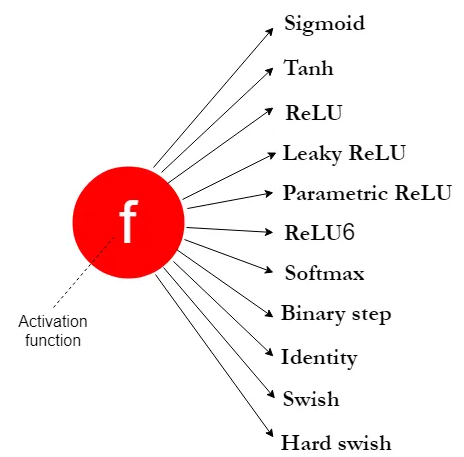  
Fonte: https://towardsdatascience.com/how-to-choose-the-right-activation-function-for-neural-networks-3941ff0e6f9c  

* **Número de neurônios na camada de saída:** um modelo de regressão terá como resposta um único número, sendo assim, a camada de saída terá um único neurônio.  
Nos problemas de classificação, temos alguns cenários possíveis.
Por exemplo: Um problema onde a resposta deve ser SIM ou NÃO (classificação binária), teremos a camada de saída com dois neurônios, sendo um representando a resposta SIM e o outro representando a resposta NÃO.    
Já em um problema de visão computacional onde precisamos identificar dentre milhares de fotos de animais, quais são de cachorros, gatos, pássaros ou tartarugas. Neste caso, temos quatro classes e por isso a camada de saída deverá ter quatro neurônios, sendo um para cada animal que queremos identificar.    


#### Resumo do modelo

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#### O Treinamento Propriamente Dito  
Nesta etapa o uso de GPUs faz toda a diferença

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8786 - loss: 0.4286
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9647 - loss: 0.1225
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9765 - loss: 0.0792
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9835 - loss: 0.0568
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9863 - loss: 0.0446
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9901 - loss: 0.0332
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9927 - loss: 0.0260
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9943 - loss: 0.0196
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9953 - loss: 0.0158
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9959 - loss: 0.0139


#### Validando a acurácia do modelo na base de teste

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nAcurácia do modelo na base de teste:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9721 - loss: 0.1135

Acurácia do modelo na base de teste: 0.9757999777793884


In [16]:
# mostrar scores graficamente
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

In [17]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(10),range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [18]:
# predições
predictions = model.predict(test_images)
print(predictions[876])

print(str(np.argmax(predictions[876])))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.8060001e-18 2.2540235e-17 7.4938063e-11 4.7523936e-06 1.3464962e-13
 2.3511450e-06 4.5103504e-11 7.0663570e-16 9.9999279e-01 1.5763735e-10]
8


#### Podemos escolher aleatoriamente uma fogura e verificar se ela foi classificada corretamente ou não. No exemplo abaixo, escolhemos a figura 876

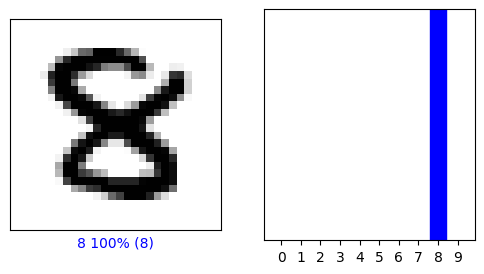

In [19]:
# Imprime a predição
i = 876
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

#### Aqui é possível visualizarmos a figura original e a classificação realizada pelo modelo

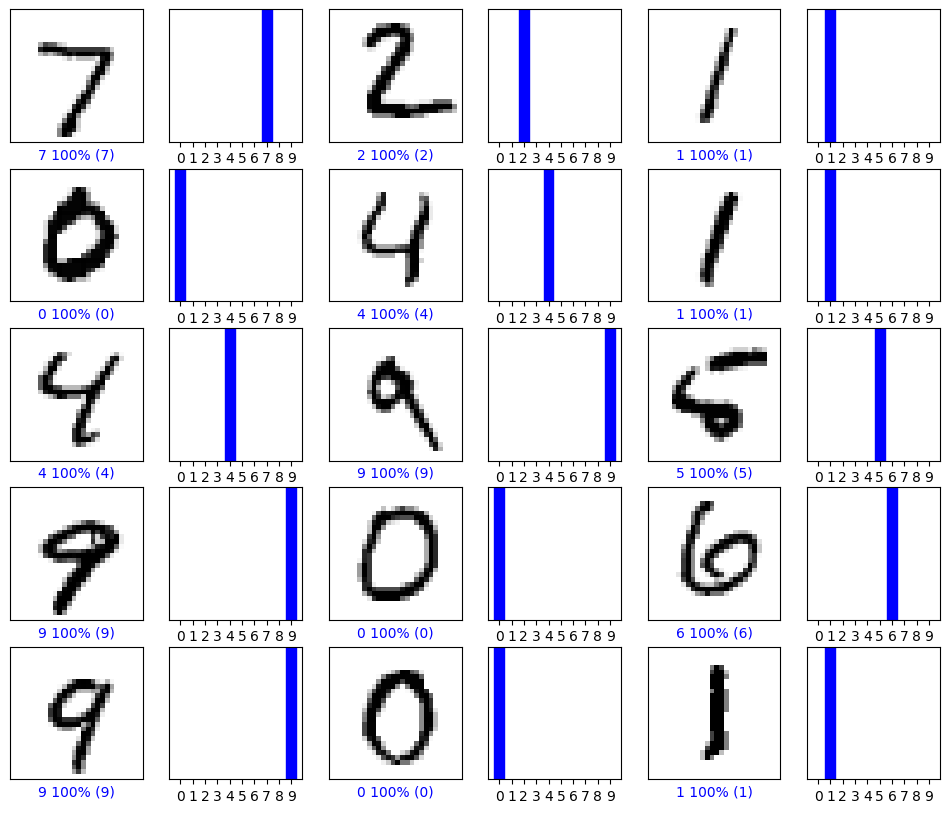

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

#### Onde o modelo errou ?

In [21]:
predictions = model.predict(test_images)
for i in range(1000):
  if(np.argmax(predictions[i]) != test_labels[i]):
    print(i)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
115
126
247
321
340
381
445
448
495
582
613
659
684
691
720
810
900
947
951
956


#### Imprimindo a figura 965

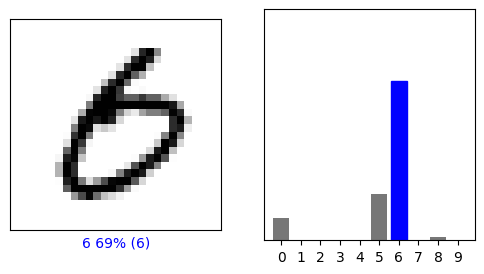

In [22]:
i = 965
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

Podemos verificar que o modelo interpretou o número 6 erroneamente como 0, 5 e 8.